In [1]:
from astropy import units as u
from astropy import constants as const
from matplotlib import pyplot as plt
import numpy as np
import regions
from astropy.io import fits
from astropy import wcs
from spectral_cube import SpectralCube
from spectral_cube import Projection
import dust_emissivity
from astropy.table import Table


fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [2]:
co_abundance = 10**(-4) #* 3

## Measurements

In [3]:
a_fixednames =['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.C18O.spw31.fits' 
               ]

cube_17 = SpectralCube.read(a_fixednames[0]).with_spectral_unit(u.km / u.second, velocity_convention='radio')
cube_29 = SpectralCube.read(a_fixednames[6]).with_spectral_unit(u.km / u.second, velocity_convention='radio')
cube_31 = SpectralCube.read(a_fixednames[7]).with_spectral_unit(u.km / u.second, velocity_convention='radio')

In [4]:
def noise_mask(cube, vmin, vmax, level):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).std(axis=0)
    peak = cube.max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

def noise_mask_slab(cube, vmin, vmax, level, cut1, cut2):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).std(axis=0)
    peak = cube.spectral_slab(cut1, cut2).max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

In [5]:
mask_17 = noise_mask(cube_17, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_29 = noise_mask(cube_29, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_31 = noise_mask(cube_31, -100*u.km/u.second, -50 *u.km/u.second, 5)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out

INFO: Auto-setting vmin to  9.293e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.370e+02 [aplpy.core]
INFO: Auto-setting vmin to  9.447e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.384e+02 [aplpy.core]


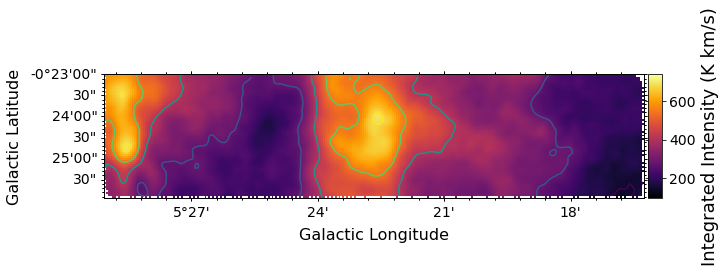

In [6]:
cube17_0 = cube_17.spectral_slab(15*u.km/u.s, 225*u.km/u.s).moment0()#.with_mask(mask_17).moment0()
cube17_0.quicklook()
cube17_0.FITSFigure.show_colorscale(cmap='inferno')
cube17_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube17_0.FITSFigure.show_contour(cube17_0.hdu, returnlevels=True)
cube17_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_0.FITSFigure.colorbar.set_font(size=14)
cube17_0.FITSFigure.axis_labels.set_font(size=16)
cube17_0.FITSFigure.tick_labels.set_font(size=14)
#cube17_0.FITSFigure.add_label(0.9, 0.96, "$^{12}$CO (2-1)", relative=True, size=18)
#cube17_0.FITSFigure.add_scalebar(ang, color='white', size=18)
#cube17_0.FITSFigure.scalebar.set_label(m)
#cube17_0.FITSFigure.show_regions('/orange/adamginsburg/cmz/g5/code/g5-lowvelo.reg')
#cube17_0.FITSFigure.show_regions('/orange/adamginsburg/cmz/g5/code/g5-highvelo.reg')
#cube17_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_17-new.pdf')

INFO: Auto-setting vmin to -3.633e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.028e+01 [aplpy.core]
INFO: Auto-setting vmin to  1.961e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.994e+01 [aplpy.core]


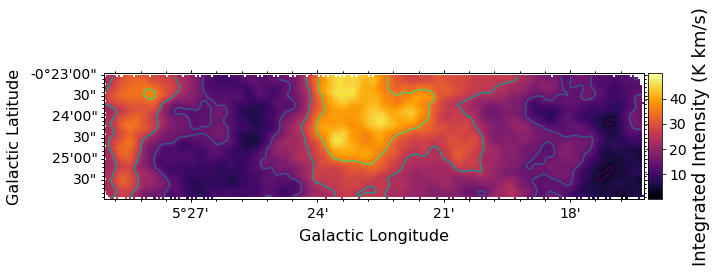

In [7]:
cube29_0 = cube_29.spectral_slab(15*u.km/u.s, 225*u.km/u.s).with_mask(mask_29).moment0()
cube29_0.quicklook()
cube29_0.FITSFigure.show_colorscale(cmap='inferno')
cube29_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube29_0.FITSFigure.show_contour(cube29_0.hdu, returnlevels=True)
cube29_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube29_0.FITSFigure.colorbar.set_font(size=14)
cube29_0.FITSFigure.axis_labels.set_font(size=16)
cube29_0.FITSFigure.tick_labels.set_font(size=14)

INFO: Auto-setting vmin to -5.828e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.466e+00 [aplpy.core]
INFO: Auto-setting vmin to -6.678e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.442e+00 [aplpy.core]


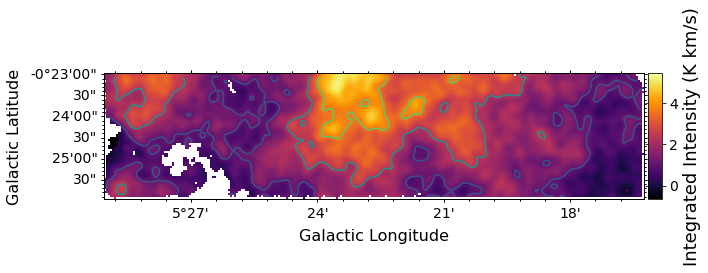

In [8]:
cube31_0 = cube_31.spectral_slab(15*u.km/u.s, 225*u.km/u.s).with_mask(mask_31).moment0()
cube31_0.quicklook()
cube31_0.FITSFigure.show_colorscale(cmap='inferno')
cube31_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube31_0.FITSFigure.show_contour(cube31_0.hdu, returnlevels=True)
cube31_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube31_0.FITSFigure.colorbar.set_font(size=14)
cube31_0.FITSFigure.axis_labels.set_font(size=16)
cube31_0.FITSFigure.tick_labels.set_font(size=14)

## Mass Estimate from Strong et al X-Factor 

In [9]:
xfactor = 2.3 * 10**20 *u.cm**(-2) * (u.K * u.km / u.second)**(-1)
d = 7 * u.kpc

INFO: Auto-setting vmin to  1.730e+22 [aplpy.core]
INFO: Auto-setting vmax to  1.355e+23 [aplpy.core]
INFO: Auto-setting vmin to  1.730e+22 [aplpy.core]
INFO: Auto-setting vmax to  1.354e+23 [aplpy.core]


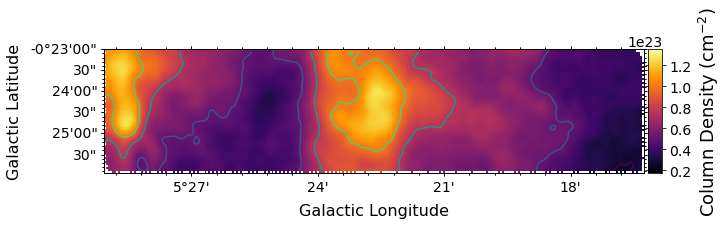

In [10]:
cube17_xcold = cube17_0 * xfactor * 0.8
cube17_xcold.quicklook()
cube17_xcold.FITSFigure.show_colorscale(cmap='inferno')
cube17_xcold.FITSFigure.colorbar.set_axis_label_text('Column Density (cm$^{-2}$)')
cube17_xcold.FITSFigure.show_contour(cube17_0.hdu, returnlevels=True)
cube17_xcold.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_xcold.FITSFigure.colorbar.set_font(size=14)
cube17_xcold.FITSFigure.axis_labels.set_font(size=16)
cube17_xcold.FITSFigure.tick_labels.set_font(size=14)

In [11]:
pix_area = cube17_0.wcs.celestial.proj_plane_pixel_area()
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_conv = 2.8 * u.Da
mass_map = (cube17_xcold * pix_area_cm * mass_conv).to(u.M_sun)

In [187]:
colden_xfactor = np.nanmean(cube17_xcold)
colden_xfactor

<Projection 6.51961434e+22 1 / cm2>

In [13]:
### CO-to-H2 Gas Mass Estimate
mass_xfactor = mass_map.nansum()
mass_xfactor

<Projection 222569.97555436 solMass>

In [259]:
colden_xfactor_err = np.sqrt((np.nanstd(cube17_0)/np.nanmean(cube17_0))**2 + (0.3/2.3)**2)*colden_xfactor

In [260]:
#np.sqrt(17262*((colden_xfactor_err * pix_area_cm * mass_conv).value * u.u).to(u.Msun)**2)
mass_xfactor_err = np.sqrt((colden_xfactor_err/colden_xfactor)**2)*mass_xfactor

## Mass Estimate from Dust Emissivity

In [14]:
### Mass Estimate from Dust Emissivity 

In [15]:
# Field 2
pacs160 = 1293.3408711236984 * u.Jy
pacs70  = 139.69878764504287 * u.Jy
her350  = 696.3290434110337  * u.Jy
her250  = 1296.7746088093395 * u.Jy
her500  = 290.8775740884424  * u.Jy
bolo11  = 11.132808608750626 * u.Jy
atlas850= 80.42944585935663  * u.Jy
reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/g5-field2.reg')
area_as = reg[0].width*reg[0].height#

In [16]:
(reg[0].height).to(u.arcmin)

<Quantity 2.68528 arcmin>

In [17]:
# Error bars are quadrature sum of statistical uncertainty (background noise) and inherent uncertainty due to flux calibration 
err70  = np.sqrt((0.05 * pacs70)**2 + (0.0090522 * u.Jy)**2) # Hi-GAL
err160 = np.sqrt((0.05 * pacs160)**2 + (0.022673243 * u.Jy)**2) # ---
err250 = np.sqrt((0.05 * her250)**2 + (0.10495919 * u.Jy)**2) # ---
err350 = np.sqrt((0.05 * her350)**2 + (0.10400883 * u.Jy)**2) # ---
err500 = np.sqrt((0.05 * her500)**2 + (0.095411145 * u.Jy)**2) # Hi-GAL
err850 = np.sqrt((0.15 * atlas850)**2 + (0.0022267786 * u.Jy)**2) # Atlasgal
err11  = np.sqrt((0.20 * bolo11)**2 + (0.0024273499 * u.Jy)**2) # Bolocam

In [18]:
sed = [
    (70*u.micron, pacs70, 'pacs', '70 um', err70), # pacsfn_1
    (160*u.micron, pacs160, 'pacs', '160 um', err160), # pacsfn_1
    (250*u.micron, her250, 'Herschel', '250 um', err250), # herfn_1
    (350*u.micron, her350, 'Herschel', '350 um', err350), # herfn_2
    (500*u.micron, her500, 'Herschel', '500 um', err500), # herfn_3
    (850*u.micron, atlas850, 'ATLASGAL', '850 um', err850),
    ((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm', err11) # Bolocam
]  

In [19]:
modfit,errs = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1]/area_as.to(u.sr) for p in sed]),
                                        #error=u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed]),
                                        error=u.Quantity([p[4]/area_as.to(u.sr) for p in sed]),
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit',
                                        return_error=True
                                       )
modfit

[<Quantity 18.08840215 K>,
 1.7573612692123384,
 <Quantity 4.33752352e+21 1 / cm2>]

In [141]:
errs

[<Quantity 1.19502387 K>,
 0.2970170702774626,
 <Quantity 6.84314103e+20 1 / cm2>]

In [20]:
area = (area_as*(d)**2).to(u.cm**2, u.dimensionless_angles()) 
column_density = modfit[2]
(area**0.5).to(u.pc)

<Quantity 11.82163496 pc>

In [21]:
area_as.to(u.arcmin**2)

<Quantity 33.70596574 arcmin2>

In [191]:
colden_dustemissivity = modfit[2]
colden_dustemissivity_err = errs[2]

In [151]:
WCO = (np.nanmean(cube17_0)*0.8)#np.nanmean(cube17_0)#466.06297*u.K/u.km/u.s #300*u.K/u.km/u.s
XCO = column_density / WCO
XCO

<Projection 1.5301985e+19 s / (cm2 K km)>

In [152]:
WCO

<Projection 283.46149286 K km / s>

In [153]:
errs[2]

<Quantity 6.84314103e+20 1 / cm2>

In [154]:
sigma_CO = np.nanstd(cube17_0)
sigma_CO

<Projection 129.23681104 K km / s>

In [155]:
np.sqrt((sigma_CO/WCO)**2 + (errs[2]/modfit[2])**2)*XCO

<Projection 7.38241969e+18 s / (cm2 K km)>

In [156]:
mass_dustemissivity = (area * column_density * 2.8*u.Da).to(u.M_sun)
mass_dustemissivity

<Quantity 13495.81888741 solMass>

In [261]:
mass_dustemissivity_err = mass_dustemissivity * (colden_dustemissivity_err / colden_dustemissivity)
mass_dustemissivity_err

<Quantity 2129.18250554 solMass>

### Alternate Dust SED Mass

In [147]:
modfit_alt,errs_alt = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral())[2:],
                                        flux=u.Quantity([p[1]/area_as.to(u.sr) for p in sed])[2:],
                                        #error=u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed]),
                                        error=u.Quantity([p[4]/area_as.to(u.sr) for p in sed])[2:],
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit',
                                        return_error=True
                                       )
modfit_alt

[<Quantity 11.89962323 K>,
 2.804959513020188,
 <Quantity 1.04121744e+22 1 / cm2>]

In [148]:
errs_alt

[<Quantity 3.42217203 K>,
 0.8029821537725436,
 <Quantity 7.18369871e+21 1 / cm2>]

In [192]:
colden_dustemissivity_alt = modfit_alt[2]
colden_dustemissivity_alt_err = errs_alt[2]

In [157]:
(modfit_alt[2]/WCO)

<Projection 3.6732236e+19 s / (cm2 K km)>

In [158]:
np.sqrt((sigma_CO/WCO)**2 + (errs_alt[2]/modfit_alt[2])**2)*(modfit_alt[2]/WCO)

<Projection 3.03763249e+19 s / (cm2 K km)>

In [28]:
mass_dustemissivity_alt = (area * colden_dustemissivity_alt * 2.8*u.Da).to(u.M_sun)
mass_dustemissivity_alt

<Quantity 32396.55525684 solMass>

In [262]:
mass_dustemissivity_alt_err = mass_dustemissivity_alt * (colden_dustemissivity_alt_err / colden_dustemissivity_alt)
mass_dustemissivity_alt_err

<Quantity 22351.43999868 solMass>

## Mass Estimate from PPMAP

In [194]:
ppmap = '/orange/adamginsburg/galactic_plane_surveys/higal/PPMAP_Results/l004_results/l004_cdens.fits'

In [198]:
colden_ppmap_err = mask.multiply(fits.open('/orange/adamginsburg/galactic_plane_surveys/higal/PPMAP_Results/l004_results/l004_sigdiffcdens.fits')[0].data[5]).mean()* (10**20) * u.cm**(-2)#*u.Unit(hdul[0].header['BUNIT'])
colden_ppmap_err   #* (10**20) * u.cm**(-2)

<Quantity 4.35967936e+20 1 / cm2>

In [196]:
r0 = reg[0]
hdul = fits.open(ppmap)
ww = wcs.WCS(hdul[0].header)
preg = r0.to_pixel(ww)
mask = preg.to_mask()
cutout = mask.cutout(hdul[0].data)
#pixelarea = 1*u.pixel
cden = (mask.multiply(hdul[0].data) * (10**20) * u.cm**(-2))
        #* u.Unit(hdul[0].header['BUNIT']))
u.Unit(hdul[0].header['BUNIT'])

Unit("1e+20 / cm2")

In [197]:
colden_ppmap = np.nanmean(cden)
colden_ppmap

<Quantity 8.67898566e+21 1 / cm2>

In [32]:
pix_area_2 = ww.celestial.proj_plane_pixel_area()
pix_area_cm_2 = (pix_area_2 * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_ppmap = (pix_area_cm_2 * cden * u.Da*2.8).to(u.M_sun).sum()
mass_ppmap

<Quantity 28276.25379947 solMass>

In [263]:
mass_ppmap_err = mass_ppmap * colden_ppmap_err / colden_ppmap
mass_ppmap_err

<Quantity 1420.38948892 solMass>

In [166]:
fits.open('/orange/adamginsburg/galactic_plane_surveys/higal/PPMAP_Results/l004_results/l004_sigdiffcdens.fits')[0].data.shape#*u.Unit(hdul[0].header['BUNIT'])

(12, 1440, 1440)

In [179]:
colden_ppmap/WCO

<Projection 3.06178648e+19 s / (cm2 K km)>

In [184]:
np.sqrt((sigma_CO/WCO)**2 + (err_ppmap/colden_ppmap)**2)*colden_ppmap/WCO     # *XCO

<Projection 1.40438819e+19 s / (cm2 K km)>

## Mass Estimate from CO LTE

In [33]:
### CO mass estimate from assuming LTE and taking into account opacity

In [34]:
def planck(T, nu):
    return (const.h*nu/const.k_B)/(np.exp(const.h*nu/(const.k_B*T))-1)

In [35]:
#(0.11079 *u.Debye).to(u.esu * u.cm)

### 12CO

In [199]:
# Excitation Temperature 
#Tex =hν/kln nl gunu gl,

# Radiation Temperature
#TR ≡ c22kν2 ∆Iν 

Tex = 60 * u.K
Tbg = 2.725 * u.K
mu = (1.1079*10**(-19) * u.esu * u.cm).to(u.cm*(u.cm**(3/2) * u.gram**(1/2) * u.second**(-1)))
J = 2
S = J / (2*J+1)

ju = 2
S = ju / (2*ju+1)
#µ = 0.11011*u.Debye #0.11079 Debye = 1.1079 × 10−19 esu cm 0.11011
B0 = 57635.968*u.MHz #B0 = 54891.420 *u.MHz
gJ = 2*ju + 1
gK = 1 #(for linear molecules)
gI = 1 #(for linear molecules)
Q_rot_12 = const.k_B * Tex / (const.h * B0) + 1./3. #Qrot = 0.38 * (T + 0.88*u.K)
Eu_12 = 16.59608 * u.K
freq_12 = (230.5380000 * u.GHz).to(u.Hz)
#Eu = 16.59608 * u.K # JPL
#v = (230.5380000 * u.GHz).to(u.Hz)
one = (3 * const.h)/(8 * np.pi**3 * S * mu**2) 
two = Q_rot_12/(2*J+1)
three = np.exp(Eu_12/(Tex))/(np.exp(const.h * freq_12/(const.k_B * Tex))-1)
four = (planck(Tex, freq_12)-planck(Tbg, freq_12))**(-1)

In [200]:
# 12CO
Eu_12 = 16.59608 * u.K
freq_12 = (230.5380000 * u.GHz).to(u.Hz)

Q_rot_12 = const.k_B * Tex / (const.h * B0) + 1./3.
one = (3 * const.h)/(8 * np.pi**3 * S * mu**2) 
two = Q_rot_12/(2*J+1)
three = np.exp(Eu_12/(Tex))/(np.exp(const.h * freq_12/(const.k_B * Tex))-1)
four = (planck(Tex, freq_12)-planck(Tbg, freq_12))**(-1)
I0 = 800 * u.K * (u.km / u.second)#.to(u.Hz, equivalencies=u.doppler_radio(freq_12))

N = one * two * three * four * I0

In [201]:
(u.cm**(3/2) * u.gram**(1/2) * u.second**(-1)).to(u.esu)

1.0

In [202]:
N.to(u.cm**(-2))


<Quantity 6.87957682e+17 1 / cm2>

INFO: Auto-setting vmin to  8.161e+16 [aplpy.core]
INFO: Auto-setting vmax to  6.333e+17 [aplpy.core]


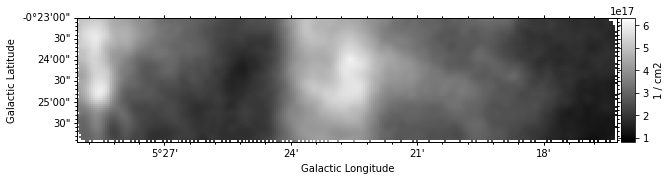

In [203]:
#save = (one * two * three * four * mom0_17).to(u.cm**(-2))
save = (one * two * three * four * cube17_0).to(u.cm**(-2))
save.quicklook()
save.FITSFigure.colorbar.set_axis_label_text(save.unit)

In [204]:
save_h2 = save / co_abundance
pix_area = save_h2.wcs.celestial.proj_plane_pixel_area()
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_conv = 2.8 * u.Da
mass_map = (save_h2 * pix_area_cm * mass_conv).to(u.M_sun)
mass_lte12co = np.nansum(mass_map)
mass_lte12co

<Projection 10402.08726154 solMass>

In [205]:
colden_lte12co = np.nanmean(save_h2)
colden_lte12co

<Projection 3.04702362e+21 1 / cm2>

In [206]:
colden_lte12co_err = np.nanstd(save_h2)
colden_lte12co_err

<Projection 1.11136821e+21 1 / cm2>

In [264]:
mass_lte12co_err = mass_lte12co * colden_lte12co_err / colden_lte12co
mass_lte12co_err

<Projection 3794.04644286 solMass>

#### Tau Correction

In [44]:
interp_cube17 = cube_17.spectral_interpolate(cube_29.spectral_axis)
reproj_cube17 = interp_cube17.reproject(cube_29.header)

In [45]:
opacity = fits.open('/orange/adamginsburg/cmz/g5/code/plots/tau_cube.fits')[0].data
#fits.open('/orange/adamginsburg/cmz/g5/code/plots/opa1213.fits')
# '/orange/adamginsburg/cmz/g5/code/plots/tau_cube.fits'
#opacity[opacity==0] = np.nan
opa_correction = opacity / (1-np.exp(-opacity))
opa_correction[opacity==0] = 1.0

/scratch/local/56784592/ipykernel_87497/1106750837.py:5: RuntimeWarning: invalid value encountered in divide
  opa_correction = opacity / (1-np.exp(-opacity))


In [46]:
opacor_cube17 = reproj_cube17*opa_correction
cube17_0_corr = opacor_cube17.spectral_slab(15*u.km/u.s, 225*u.km/u.s).moment0()

In [47]:
save = (one * two * three * four * cube17_0_corr).to(u.cm**(-2))

In [48]:
#N_tot = save * opacity[0].data / (1-np.exp(-opacity[0].data))  #*opacity[0].data

INFO: Auto-setting vmin to  6.800e+16 [aplpy.core]
INFO: Auto-setting vmax to  1.136e+18 [aplpy.core]


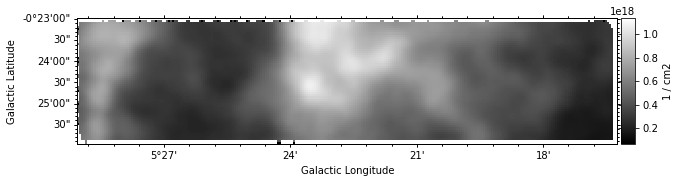

In [49]:
N_tot = Projection(value=save, wcs=save.wcs)
N_tot.quicklook()
N_tot.FITSFigure.colorbar.set_axis_label_text(N_tot.unit)

INFO: Auto-setting vmin to  6.874e+20 [aplpy.core]
INFO: Auto-setting vmax to  1.141e+22 [aplpy.core]


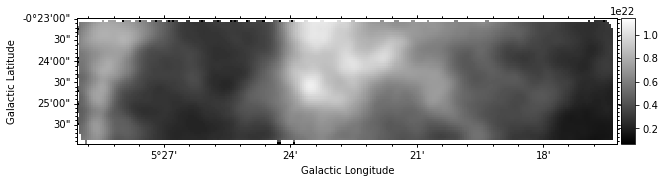

In [50]:
N_tot_h2 = N_tot/co_abundance
N_tot_h2.quicklook()

In [51]:
pix_area = N_tot_h2.wcs.celestial.proj_plane_pixel_area()
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_conv = 2.8 * u.Da
mass_map = (N_tot_h2 * pix_area_cm * mass_conv).to(u.M_sun)
mass_lte12co_tau = np.nansum(mass_map)
mass_lte12co_tau

<Projection 16541.01381002 solMass>

In [52]:
colden_lte12co_tau = np.nanmean(N_tot_h2)

In [208]:
colden_lte12co_tau_err = np.nanstd(N_tot_h2)

In [265]:
mass_lte12co_tau_err = mass_lte12co_tau * colden_lte12co_tau_err / colden_lte12co_tau

### 12C/13C = 40

In [53]:
opacity_40 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/tau_cube_40.fits')[0].data
opa_correction_40 = opacity_40 / (1-np.exp(-opacity_40))
opa_correction_40[opacity_40==0] = 1.0

/scratch/local/56784592/ipykernel_87497/3593210332.py:2: RuntimeWarning: invalid value encountered in divide
  opa_correction_40 = opacity_40 / (1-np.exp(-opacity_40))


In [54]:
opacor_cube17_40 = reproj_cube17*opa_correction_40
cube17_0_corr_40 = opacor_cube17_40.spectral_slab(15*u.km/u.s, 225*u.km/u.s).moment0()

In [55]:
save_40 = (one * two * three * four * cube17_0_corr_40).to(u.cm**(-2))

INFO: Auto-setting vmin to  9.296e+16 [aplpy.core]
INFO: Auto-setting vmax to  1.771e+18 [aplpy.core]


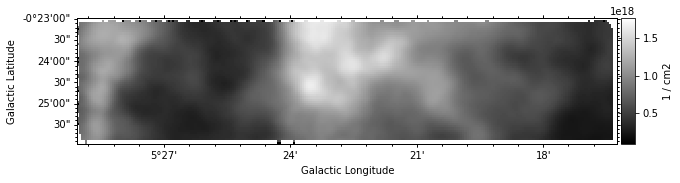

In [56]:
N_tot_40 = Projection(value=save_40, wcs=save_40.wcs)
N_tot_40.quicklook()
N_tot_40.FITSFigure.colorbar.set_axis_label_text(N_tot_40.unit)

INFO: Auto-setting vmin to  9.327e+20 [aplpy.core]
INFO: Auto-setting vmax to  1.768e+22 [aplpy.core]


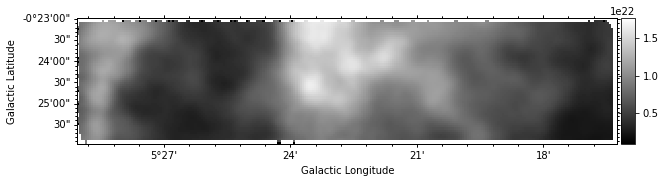

In [57]:
N_tot_h2_40 = N_tot_40/co_abundance
N_tot_h2_40.quicklook()

In [58]:
pix_area = N_tot_h2_40.wcs.celestial.proj_plane_pixel_area()
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_conv = 2.8 * u.Da
mass_map_40 = (N_tot_h2_40 * pix_area_cm * mass_conv).to(u.M_sun)
mass_lte12co_tau_40 = np.nansum(mass_map_40)
mass_lte12co_tau_40

<Projection 24987.25911325 solMass>

In [59]:
colden_lte12co_tau_40 = np.nanmean(N_tot_h2_40)
colden_lte12co_tau_40

<Projection 7.60499805e+21 1 / cm2>

In [209]:
colden_lte12co_tau_40_err = np.nanstd(N_tot_h2_40)
colden_lte12co_tau_40_err

<Projection 3.41301683e+21 1 / cm2>

In [266]:
mass_lte12co_tau_40_err = mass_lte12co_tau_40 * colden_lte12co_tau_40_err / colden_lte12co_tau_40

### 12C/13C = 53

In [60]:
opacity_53 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/tau_cube_53.fits')[0].data
opa_correction_53 = opacity_53 / (1-np.exp(-opacity_53))
opa_correction_53[opacity_53==0] = 1.0
opacor_cube17_53 = reproj_cube17*opa_correction_53
cube17_0_corr_53 = opacor_cube17_53.spectral_slab(15*u.km/u.s, 225*u.km/u.s).moment0()
save_53 = (one * two * three * four * cube17_0_corr_53).to(u.cm**(-2))

/scratch/local/56784592/ipykernel_87497/3358865389.py:2: RuntimeWarning: invalid value encountered in divide
  opa_correction_53 = opacity_53 / (1-np.exp(-opacity_53))


INFO: Auto-setting vmin to  1.049e+17 [aplpy.core]
INFO: Auto-setting vmax to  2.320e+18 [aplpy.core]


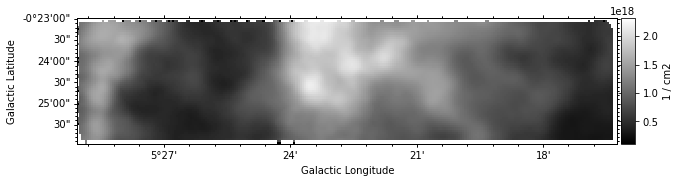

In [61]:
N_tot_53 = Projection(value=save_53, wcs=save_53.wcs)
N_tot_53.quicklook()
N_tot_53.FITSFigure.colorbar.set_axis_label_text(N_tot_53.unit)

INFO: Auto-setting vmin to  1.122e+21 [aplpy.core]
INFO: Auto-setting vmax to  2.317e+22 [aplpy.core]


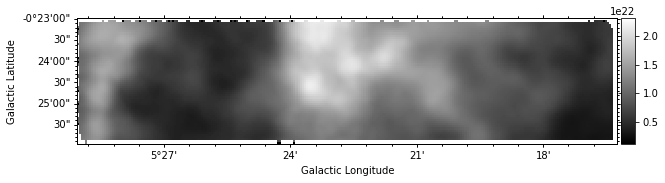

In [62]:
N_tot_h2_53 = N_tot_53/co_abundance
N_tot_h2_53.quicklook()

In [63]:
pix_area = N_tot_h2_53.wcs.celestial.proj_plane_pixel_area()
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_conv = 2.8 * u.Da
mass_map_53 = (N_tot_h2_53 * pix_area_cm * mass_conv).to(u.M_sun)
mass_lte12co_tau_53 = np.nansum(mass_map_53)
mass_lte12co_tau_53

<Projection 32368.17191636 solMass>

In [64]:
colden_lte12co_tau_53 = np.nanmean(N_tot_h2_53)
colden_lte12co_tau_53

<Projection 9.85141601e+21 1 / cm2>

In [210]:
colden_lte12co_tau_53_err = np.nanstd(N_tot_h2_53)
colden_lte12co_tau_53_err

<Projection 4.50501157e+21 1 / cm2>

In [267]:
mass_lte12co_tau_53_err = mass_lte12co_tau_53 * colden_lte12co_tau_53_err / colden_lte12co_tau_53

### 12C/13C = 77

In [65]:
opacity_77 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/tau_cube_77.fits')[0].data
opa_correction_77 = opacity_77 / (1-np.exp(-opacity_77))
opa_correction_77[opacity_77==0] = 1.0
opacor_cube17_77 = reproj_cube17*opa_correction_77
cube17_0_corr_77 = opacor_cube17_77.spectral_slab(15*u.km/u.s, 225*u.km/u.s).moment0()
save_77 = (one * two * three * four * cube17_0_corr_77).to(u.cm**(-2))

/scratch/local/56784592/ipykernel_87497/3445284832.py:2: RuntimeWarning: invalid value encountered in divide
  opa_correction_77 = opacity_77 / (1-np.exp(-opacity_77))


INFO: Auto-setting vmin to  1.330e+17 [aplpy.core]
INFO: Auto-setting vmax to  3.339e+18 [aplpy.core]


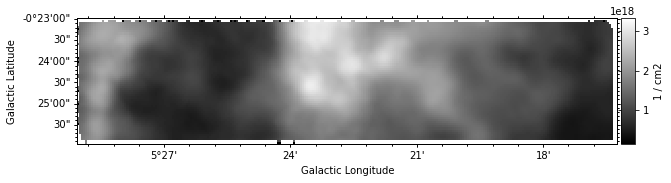

In [66]:
N_tot_77 = Projection(value=save_77, wcs=save_77.wcs)
N_tot_77.quicklook()
N_tot_77.FITSFigure.colorbar.set_axis_label_text(N_tot_77.unit)

INFO: Auto-setting vmin to  1.320e+21 [aplpy.core]
INFO: Auto-setting vmax to  3.336e+22 [aplpy.core]


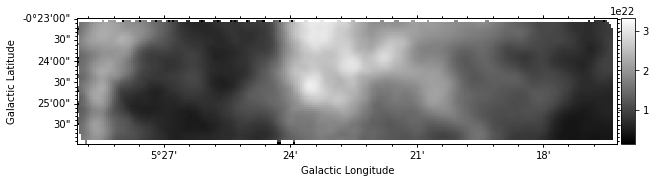

In [67]:
N_tot_h2_77 = N_tot_77/co_abundance
N_tot_h2_77.quicklook()

In [68]:
pix_area = N_tot_h2_77.wcs.celestial.proj_plane_pixel_area()
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_conv = 2.8 * u.Da
mass_map_77 = (N_tot_h2_77 * pix_area_cm * mass_conv).to(u.M_sun)
mass_lte12co_tau_77 = np.nansum(mass_map_77)
mass_lte12co_tau_77

<Projection 45970.61740597 solMass>

In [69]:
colden_lte12co_tau_77 = np.nanmean(N_tot_h2_77)
colden_lte12co_tau_77

<Projection 1.39913887e+22 1 / cm2>

In [211]:
colden_lte12co_tau_77_err = np.nanstd(N_tot_h2_77)
colden_lte12co_tau_77_err

<Projection 6.5198543e+21 1 / cm2>

In [268]:
mass_lte12co_tau_77_err = mass_lte12co_tau_77 * colden_lte12co_tau_77_err / colden_lte12co_tau_77

### 12C/13C = 89

In [70]:
opacity_89 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/tau_cube_89.fits')[0].data
opa_correction_89 = opacity_89 / (1-np.exp(-opacity_89))
opa_correction_89[opacity_89==0] = 1.0
opacor_cube17_89 = reproj_cube17*opa_correction_89
cube17_0_corr_89 = opacor_cube17_89.spectral_slab(15*u.km/u.s, 225*u.km/u.s).moment0()
save_89 = (one * two * three * four * cube17_0_corr_89).to(u.cm**(-2))

/scratch/local/56784592/ipykernel_87497/524560353.py:2: RuntimeWarning: invalid value encountered in divide
  opa_correction_89 = opacity_89 / (1-np.exp(-opacity_89))


INFO: Auto-setting vmin to  1.417e+17 [aplpy.core]
INFO: Auto-setting vmax to  3.852e+18 [aplpy.core]


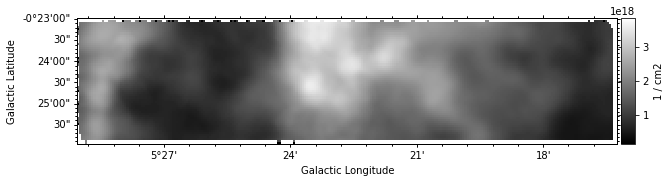

In [71]:
N_tot_89 = Projection(value=save_89, wcs=save_89.wcs)
N_tot_89.quicklook()
N_tot_89.FITSFigure.colorbar.set_axis_label_text(N_tot_89.unit)

INFO: Auto-setting vmin to -3.503e+21 [aplpy.core]
INFO: Auto-setting vmax to  3.897e+22 [aplpy.core]


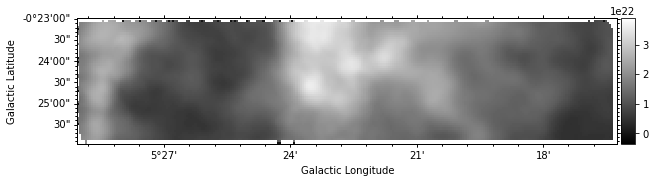

In [72]:
N_tot_h2_89 = N_tot_89/co_abundance
N_tot_h2_89.quicklook()

In [73]:
pix_area = N_tot_h2_89.wcs.celestial.proj_plane_pixel_area()
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_conv = 2.8 * u.Da
mass_map_89 = (N_tot_h2_89 * pix_area_cm * mass_conv).to(u.M_sun)
mass_lte12co_tau_89 = np.nansum(mass_map_89)
mass_lte12co_tau_89

<Projection 52766.38244167 solMass>

In [74]:
colden_lte12co_tau_89 = np.nanmean(N_tot_h2_89)
colden_lte12co_tau_89

<Projection 1.6059714e+22 1 / cm2>

In [212]:
colden_lte12co_tau_89_err = np.nanstd(N_tot_h2_89)
colden_lte12co_tau_89_err

<Projection 7.52754196e+21 1 / cm2>

In [269]:
mass_lte12co_tau_89_err = mass_lte12co_tau_89 * colden_lte12co_tau_89_err / colden_lte12co_tau_89

## Old tau corrections

#### Alternate $\tau$ Correction 16O/18O = 250

In [75]:
#opacity_18 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/opa1218.fits')

In [76]:
#N_tot_18 = Projection(value=save * opacity_18[0].data / (1-np.exp(-opacity_18[0].data)), wcs=save.wcs)
#N_tot_18.quicklook()
#N_tot_18.FITSFigure.colorbar.set_axis_label_text(N_tot_18.unit)

In [77]:
#N_tot_h2_18 = N_tot_18/co_abundance
#N_tot_h2_18.quicklook()

In [78]:
#pix_area = N_tot_h2_18.wcs.celestial.proj_plane_pixel_area()
#pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
#mass_conv = 2.8 * u.Da
#mass_map_18 = (N_tot_h2_18 * pix_area_cm * mass_conv).to(u.M_sun)
#mass_lte12co_tau_18 = np.nansum(mass_map_18)
#mass_lte12co_tau_18

In [79]:
#colden_lte12co_tau_18 = np.nanmean(N_tot_h2_18)

#### Alternate $\tau$ Correction 16O/18O = 275

In [80]:
#opacity_275 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/opa1218_275.fits')

In [81]:
#N_tot_275 = Projection(value=save * opacity_275[0].data / (1-np.exp(-opacity_275[0].data)), wcs=save.wcs)
#N_tot_275.quicklook()
#N_tot_275.FITSFigure.colorbar.set_axis_label_text(N_tot_275.unit)

In [82]:
#N_tot_h2_275 = N_tot_275/co_abundance
#N_tot_h2_275.quicklook()

In [83]:
#pix_area = N_tot_h2_275.wcs.celestial.proj_plane_pixel_area()
#pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
#mass_conv = 2.8 * u.Da
#mass_map_275 = (N_tot_h2_275 * pix_area_cm * mass_conv).to(u.M_sun)
#mass_lte12co_tau_275 = np.nansum(mass_map_275)
#mass_lte12co_tau_275

In [84]:
#colden_lte12co_tau_275 = np.nanmean(N_tot_h2_275)

#### Alternate $\tau$ Correction 16O/18O = 350

In [85]:
#opacity_350 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/opa1218_350.fits')

In [86]:
#N_tot_350 = Projection(value=save * opacity_350[0].data / (1-np.exp(-opacity_350[0].data)), wcs=save.wcs)
#N_tot_350.quicklook()
#N_tot_350.FITSFigure.colorbar.set_axis_label_text(N_tot_350.unit)

In [87]:
#N_tot_h2_350 = N_tot_350/co_abundance
#N_tot_h2_350.quicklook()

In [88]:
#pix_area = N_tot_h2_350.wcs.celestial.proj_plane_pixel_area()
#pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
#mass_conv = 2.8 * u.Da
#mass_map_350 = (N_tot_h2_350 * pix_area_cm * mass_conv).to(u.M_sun)
#mass_lte12co_tau_350 = np.nansum(mass_map_350)
#mass_lte12co_tau_350

In [89]:
#colden_lte12co_tau_350 = np.nanmean(N_tot_h2_350)

#### Alternate $\tau$ Correction 16O/18O = 440

In [90]:
#opacity_440 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/opa1218_440.fits')

In [91]:
#N_tot_440 = Projection(value=save * opacity_440[0].data / (1-np.exp(-opacity_440[0].data)), wcs=save.wcs)
#N_tot_440.quicklook()
#N_tot_440.FITSFigure.colorbar.set_axis_label_text(N_tot_440.unit)

In [92]:
#N_tot_h2_440 = N_tot_440/co_abundance
#N_tot_h2_440.quicklook()

In [93]:
#pix_area = N_tot_h2_440.wcs.celestial.proj_plane_pixel_area()
#pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
#mass_conv = 2.8 * u.Da
#mass_map_440 = (N_tot_h2_440 * pix_area_cm * mass_conv).to(u.M_sun)
#mass_lte12co_tau_440 = np.nansum(mass_map_440)
#mass_lte12co_tau_440

In [94]:
#colden_lte12co_tau_440 = np.nanmean(N_tot_h2_440)

#### Alternate $\tau$ Correction 12C/13C = 30

In [95]:
#opacity_30 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/opa1213_30.fits')

In [96]:
#N_tot_30 = Projection(value=save * opacity_30[0].data / (1-np.exp(-opacity_30[0].data)), wcs=save.wcs)
#N_tot_30.quicklook()
#N_tot_30.FITSFigure.colorbar.set_axis_label_text(N_tot_30.unit)

In [97]:
#N_tot_h2_30 = N_tot_30/co_abundance
#N_tot_h2_30.quicklook()

In [98]:
#pix_area = N_tot_h2_30.wcs.celestial.proj_plane_pixel_area()
#pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
#mass_conv = 2.8 * u.Da
#mass_map_30 = (N_tot_h2_30 * pix_area_cm * mass_conv).to(u.M_sun)
#mass_lte12co_tau_30 = np.nansum(mass_map_30)
#mass_lte12co_tau_30

In [99]:
#colden_lte12co_tau_30 = np.nanmean(N_tot_h2_30)
#colden_lte12co_tau_30

#### Alternate $\tau$ Correction 12C/13C = 40

In [100]:
#opacity_40 = fits.open('/orange/adamginsburg/cmz/g5/code/plots/opa1213_40.fits')

In [101]:
#N_tot_40 = Projection(value=save * opacity_40[0].data / (1-np.exp(-opacity_40[0].data)), wcs=save.wcs)
#N_tot_40.quicklook()
#N_tot_40.FITSFigure.colorbar.set_axis_label_text(N_tot_40.unit)

In [102]:
#N_tot_h2_40 = N_tot_40/co_abundance
#N_tot_h2_40.quicklook()

In [103]:
#pix_area = N_tot_h2_40.wcs.celestial.proj_plane_pixel_area()
#pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
#mass_conv = 2.8 * u.Da
#mass_map_40 = (N_tot_h2_40 * pix_area_cm * mass_conv).to(u.M_sun)
#mass_lte12co_tau_40 = np.nansum(mass_map_40)
#mass_lte12co_tau_40

In [104]:
#colden_lte12co_tau_40 = np.nanmean(N_tot_h2_40)

## Continued LTE

### 13CO

In [105]:
Eu_29 = 15.86618 * u.K
freq_29 = (220.39867650 * u.GHz).to(u.Hz)
B0_29 = 55101.011 * u.MHz
Q_rot_29 = const.k_B * Tex / (const.h * B0_29) + 1./3.
#mu_29 = 0.11046*u.Debye
mu_29 = (1.1046*10**(-19) * u.esu * u.cm).to(u.cm*(u.cm**(3/2) * u.gram**(1/2) * u.second**(-1)))


J = 2
S = J / (2*J+1)

one_29 = (3 * const.h)/(8 * np.pi**3 * S * mu_29**2) 
two_29 = Q_rot_29/(2*J+1)
three_29 = np.exp(Eu_29/(Tex))/(np.exp(const.h * freq_29/(const.k_B * Tex))-1)
four_29 = (planck(Tex, freq_29)-planck(Tbg, freq_29))**(-1)



INFO: Auto-setting vmin to -2.971e+14 [aplpy.core]
INFO: Auto-setting vmax to  4.680e+16 [aplpy.core]


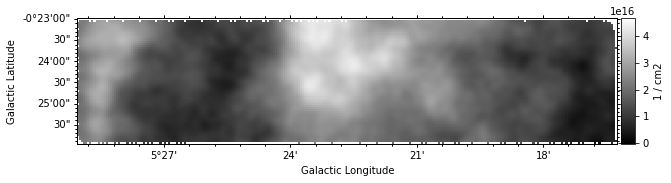

In [106]:
save_29 = (one_29 * two_29 * three_29 * four_29 * cube29_0).to(u.cm**(-2))
save_29.quicklook()
save_29.FITSFigure.colorbar.set_axis_label_text(save_29.unit)

In [107]:
ratio_12C_13C = 25
N_29_h2 = save_29 * ratio_12C_13C / co_abundance
pix_area = N_29_h2.wcs.celestial.proj_plane_pixel_area()
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_conv = 2.8 * u.Da
mass_map = (N_29_h2 * pix_area_cm * mass_conv).to(u.M_sun)
mass_lte13co = np.nansum(mass_map)
mass_lte13co

<Projection 16449.31508973 solMass>

In [213]:
colden_lte13co = np.nanmean(N_29_h2)
colden_lte13co

<Projection 4.8334599e+21 1 / cm2>

In [223]:
colden_lte13co_err = np.nanstd(N_29_h2)
colden_lte13co_err

<Projection 2.36447725e+21 1 / cm2>

In [270]:
mass_lte13co_err = mass_lte13co * colden_lte13co_err / colden_lte13co

### C18O

In [109]:
Eu_18 = 15.80580 * u.K
freq_18 = 219.56035410 * u.GHz
B0 = 54891.420 * u.MHz
Q_rot_18 = const.k_B * Tex / (const.h * B0) + 1./3.
mu_18 = (1.1079*10**(-19) * u.esu * u.cm).to(u.cm*(u.cm**(3/2) * u.gram**(1/2) * u.second**(-1)))

J = 2
S = J / (2*J+1)

one_18 = (3 * const.h)/(8 * np.pi**3 * S * mu_18**2) 
two_18 = Q_rot_18/(2*J+1)
three_18 = np.exp(Eu_18/(Tex))/(np.exp(const.h * freq_18/(const.k_B * Tex))-1)
four_18 = (planck(Tex, freq_18)-planck(Tbg, freq_18))**(-1)



INFO: Auto-setting vmin to -6.596e+14 [aplpy.core]
INFO: Auto-setting vmax to  5.120e+15 [aplpy.core]


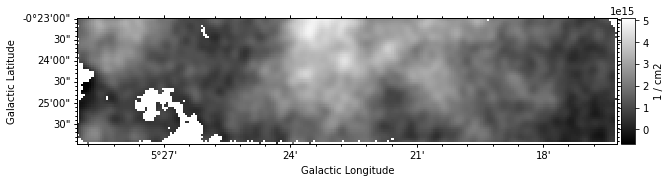

In [110]:
save_31 = (one_18 * two_18 * three_18 * four_18 * cube31_0).to(u.cm**(-2))
save_31.quicklook()
save_31.FITSFigure.colorbar.set_axis_label_text(save_31.unit)

In [111]:
ratio_16O_18O = 250
N_31_h2 = save_31 * ratio_16O_18O / co_abundance
pix_area = N_31_h2.wcs.celestial.proj_plane_pixel_area()
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_conv = 2.8 * u.Da
mass_map = (N_31_h2 * pix_area_cm * mass_conv).to(u.M_sun)
mass_ltec18o = np.nansum(mass_map)
mass_ltec18o

<Projection 14319.27012526 solMass>

In [216]:
colden_ltec18o = np.nanmean(N_31_h2)
colden_ltec18o

<Projection 4.32564368e+21 1 / cm2>

In [217]:
colden_ltec18o_err = np.nanstd(N_31_h2)
colden_ltec18o_err

<Projection 2.37892509e+21 1 / cm2>

## Putting it all together

In [275]:
masses = [mass_xfactor, mass_dustemissivity, mass_dustemissivity_alt, mass_ppmap, 
          mass_lte12co, mass_lte13co, mass_ltec18o, 
          mass_lte12co_tau, mass_lte12co_tau_40, mass_lte12co_tau_53, mass_lte12co_tau_77, mass_lte12co_tau_89
          #mass_lte12co_tau, mass_lte12co_tau_30, mass_lte12co_tau_40, 
          #mass_lte12co_tau_18, mass_lte12co_tau_275, mass_lte12co_tau_350, mass_lte12co_tau_440
         ]*u.Msun
coldensities = [colden_xfactor, colden_dustemissivity, colden_dustemissivity_alt, colden_ppmap, 
                colden_lte12co, colden_lte13co, colden_ltec18o, 
                colden_lte12co_tau, colden_lte12co_tau_40, colden_lte12co_tau_53, colden_lte12co_tau_77, colden_lte12co_tau_89
                #colden_lte12co_tau, colden_lte12co_tau_30, colden_lte12co_tau_40,
                #colden_lte12co_tau_18, colden_lte12co_tau_275, colden_lte12co_tau_350, colden_lte12co_tau_440
               ]*u.cm**(-2)
coldensities_err = [colden_xfactor_err, colden_dustemissivity_err, colden_dustemissivity_alt_err, colden_ppmap_err, 
                colden_lte12co_err, colden_lte13co_err, colden_ltec18o_err, 
                colden_lte12co_tau_err, colden_lte12co_tau_40_err, colden_lte12co_tau_53_err, colden_lte12co_tau_77_err, colden_lte12co_tau_89_err
                #colden_lte12co_tau, colden_lte12co_tau_30, colden_lte12co_tau_40,
                #colden_lte12co_tau_18, colden_lte12co_tau_275, colden_lte12co_tau_350, colden_lte12co_tau_440
               ]*u.cm**(-2)

masses_err = masses * (coldensities_err / coldensities)
xfactor_calc = coldensities / (np.nanmean(cube17_0)*0.8)
xfactor_err = xfactor_calc * np.sqrt(np.power(np.divide(coldensities_err, coldensities), 2) 
                                     + np.power(np.nanstd(cube17_0)/(np.nanmean(cube17_0)*0.8), 2))
# mass_inflow_rate * new_X_CO / old_X_CO
canon_inflow = 0.8 * u.Msun / u.year # 2.7 * u.Msun / u.year
mass_inflow_rate = canon_inflow * xfactor_calc / xfactor
mass_inflow_rate_err = mass_inflow_rate * np.sqrt(np.power(0.6/0.8, 2) +
                                                  np.power(0.3/2.3, 2) +
                                                  np.power(np.divide(xfactor_err, xfactor_calc), 2))
mass_inflow_rate_err[0] = 0.6 * u.Msun / u.year
xfactor_err[0] = 0.3 * 10**20 * u.cm**-2 / (u.K * u.km /u.second)

ratio_used = ['-', '-', '-', '-', '-',
              '$^{12}$C/$^{13}$C=25', '$^{16}$O/$^{18}$O=250',
              '$^{12}$C/$^{13}$C=25',
              '$^{12}$C/$^{13}$C=40', '$^{12}$C/$^{13}$C=53', 
              '$^{12}$C/$^{13}$C=77', '$^{12}$C/$^{13}$C=89']

for ii in range(len(masses)):
    masses[ii] = np.round(masses[ii]/(10**5), 2)#*u.Msun
    masses_err[ii] = np.round(masses_err[ii]/(10**5), 2)
    coldensities[ii] = np.round(coldensities[ii]/(10**22), 2)#*u.cm**(-2)
    coldensities_err[ii] = np.round(coldensities_err[ii]/(10**22), 2)
    xfactor_calc[ii] = np.round(xfactor_calc[ii]/(10**20), 2)
    xfactor_err[ii] = np.round(xfactor_err[ii]/(10**20), 2)
    mass_inflow_rate[ii] = np.round(mass_inflow_rate[ii], 2)
    mass_inflow_rate_err[ii] = np.round(mass_inflow_rate_err[ii], 2)

In [305]:
np.nanmean(cube17_0)*0.8

<Projection 283.46149286 K km / s>

In [300]:
methods = ['X-factor',#\\footnote{Assumed X-factor from \citet{strong88}}\\footnote{Mass inflow rate from \citet{Hatchfield2021}}', 
           'SED Fit', 
           'Max SED Fit',#\\footnote{Wavelengths \SI{250}{\micron}, \SI{350}{\micron}, \SI{500}{\micron}, \SI{850}{\micron} and \SI{1.1}{mm}}',
           'PPMAP', 
           'LTE $^{12}$CO',#\\footnote{All LTE masses assume CO/H$_2 = 10^{-4}$}', 
           'LTE $^{13}$CO',#; $^{12}$C/$^{13}$C=25', 
           'LTE C$^{18}$O',#; $^{16}$O/$^{18}$O=250', 
           'LTE $^{12}$CO: $tau$ Correction',# $^{12}$C/$^{13}$C=25',
           'LTE $^{12}$CO: $tau$ Correction', #$^{12}$C/$^{13}$C=30',
           'LTE $^{12}$CO: $tau$ Correction', #$^{12}$C/$^{13}$C=40',
           'LTE $^{12}$CO: $tau$ Correction', #$^{16}$O/$^{18}$O=250',
           'LTE $^{12}$CO: $tau$ Correction'#, #$^{16}$O/$^{18}$O=275',
           #'LTE $^{12}$CO: $\\tau$ Correction', #$^{16}$O/$^{18}$O=350',
           #'LTE $^{12}$CO: $\\tau$ Correction' #$^{16}$O/$^{18}$O=440'
          ]

In [301]:
names = ['Method', 'Mass Estimate x 10$^5$', 'Column Density (H$_2$) x 10$^{22}$', 
         'N(H$_2$)/$\int$ I$_{\nu}$ ($^{12}CO$) d$\nu$ x 10$^{20}$', 'Estimated Mass Inflow Rate', 'Assumed Ratio']

In [302]:
tbl = Table([methods, masses, coldensities, xfactor_calc, mass_inflow_rate, ratio_used], names=names)
tbl

Method,Mass Estimate x 10$^5$,Column Density (H$_2$) x 10$^{22}$,N(H$_2$)/$\int$ I$_{\nu}$ ($^{12}CO$) d$\nu$ x 10$^{20}$,Estimated Mass Inflow Rate,Assumed Ratio
,solMass,1 / cm2,s / (cm2 K km),solMass / yr,
str31,float64,float64,float64,float64,str21
X-factor,2.23,6.52,2.3,0.8,-
SED Fit,0.13,0.43,0.15,0.05,-
Max SED Fit,0.32,1.04,0.37,0.13,-
PPMAP,0.28,0.87,0.31,0.11,-
LTE $^{12}$CO,0.1,0.3,0.11,0.04,-
LTE $^{13}$CO,0.16,0.48,0.17,0.06,$^{12}$C/$^{13}$C=25
LTE C$^{18}$O,0.14,0.43,0.15,0.05,$^{16}$O/$^{18}$O=250
LTE $^{12}$CO: $tau$ Correction,0.17,0.5,0.18,0.06,$^{12}$C/$^{13}$C=25


In [303]:
#ascii.write(tbl, format='latex')
#tbl.write('/orange/adamginsburg/cmz/g5/code/plots/masstable.txt', format='latex', overwrite=True)

In [304]:
# names = ['Method', 'Mass Estimate x 10$^5$', 'Column Density (H$_2$) x 10$^{22}$', 
#         'N(H$_2$)/$\int$ I$_{\nu}$ ($^{12}CO$) d$\nu$ x 10$^{20}$', 'Estimated Mass Inflow Rate', 'Assumed Ratio']
names_2 = ['Method',
           'Mass Estimate x 10$^5$',
           'err1',#'Mass Error x 10$^5$',
           'Column Density (H$_2$) x 10$^{22}$',
           'err2',#'Column Density Error (H$_2$) x 10$^{22}$', 
           'N(H$_2$)/$\int$ I$_{\nu}$ ($^{12}CO$) d$\nu$ x 10$^{20}$',
           'err3',#'N(H$_2$)/$\int$ I$_{\nu}$ ($^{12}CO$) d$\nu$ x 10$^{20}$ Error', 
           'CMZ Inflow', 
           'err4',#'Inflow Rate Error',
           'Assumed Ratio'
          ]
# [methods, masses, coldensities, xfactor_calc, mass_inflow_rate, ratio_used]
tbl_2 = Table([methods, 
               masses,
               masses_err,
               coldensities,
               coldensities_err, 
               xfactor_calc,
               xfactor_err, 
               mass_inflow_rate,
               mass_inflow_rate_err,
               ratio_used
              ], 
              names=names_2)
tbl_2

Method,Mass Estimate x 10$^5$,err1,Column Density (H$_2$) x 10$^{22}$,err2,N(H$_2$)/$\int$ I$_{\nu}$ ($^{12}CO$) d$\nu$ x 10$^{20}$,err3,CMZ Inflow,err4,Assumed Ratio
,solMass,solMass,1 / cm2,1 / cm2,s / (cm2 K km),s / (cm2 K km),solMass / yr,solMass / yr,
str31,float64,float64,float64,float64,float64,float64,float64,float64,str21
X-factor,2.23,0.86,6.52,2.53,2.3,0.3,0.8,0.6,-
SED Fit,0.13,0.02,0.43,0.07,0.15,0.07,0.05,0.05,-
Max SED Fit,0.32,0.22,1.04,0.72,0.37,0.3,0.13,0.14,-
PPMAP,0.28,0.01,0.87,0.04,0.31,0.14,0.11,0.09,-
LTE $^{12}$CO,0.1,0.04,0.3,0.11,0.11,0.06,0.04,0.04,-
LTE $^{13}$CO,0.16,0.08,0.48,0.24,0.17,0.11,0.06,0.06,$^{12}$C/$^{13}$C=25
LTE C$^{18}$O,0.14,0.08,0.43,0.24,0.15,0.11,0.05,0.06,$^{16}$O/$^{18}$O=250
LTE $^{12}$CO: $tau$ Correction,0.17,0.07,0.5,0.22,0.18,0.11,0.06,0.06,$^{12}$C/$^{13}$C=25


In [118]:
# N(H2)/ integral symbol Iv (12CO) dv
# N(H$_2$)/$\int$ I$_{\nu}$ ($^{12}CO$) d$\nu$

In [227]:
coldensities_err

<Quantity [2.52543754e+22, 6.84314103e+20, 7.18369871e+21, 4.35967936e+20,
           1.11136821e+21, 2.36447725e+21, 2.37892509e+21, 2.15385071e+21,
           3.41301683e+21, 4.50501157e+21, 6.51985430e+21, 7.52754196e+21] 1 / cm2>

# SiO LTE Abundance

In [119]:
col_SiO = fits.open('/orange/adamginsburg/cmz/g5/code/plots/col_SiO.fits')

In [120]:
#col_SiO_p = Projection(col_SiO[0].data, col_SiO[0].header)